In [205]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfFile, PdfPages
#df = pd.read_csv("data/text/002(results).csv")
import statistics
import scipy
from sklearn import preprocessing
from sklearn.datasets import make_moons
from scipy.stats import pearsonr
from dtaidistance import dtw
from scipy.signal import hilbert, chirp

In [206]:
#df.head(4)

In [207]:
def readextremum(path,pdf_name):
    df = pd.read_csv(path)
    global length
    length = len(df)
    global pdfFile
    if q <10:
        pdfFile = PdfPages(f"data/result_images/00{q}({pdf_name}).pdf")
    else: 
        pdfFile = PdfPages(f"data/result_images/0{q}({pdf_name}).pdf")
    global wu_pulmer_score
    wu_pulmer_score = list(df["Wu-Pulmer"])
    global SBERT
    SBERT = list(df["SBERT"])
    global Wu_Pulmer_Divided 
    Wu_Pulmer_Divided = list(df["Wu-Pulmer_divided"])
    global pair_counts
    pair_counts = list(df["pair_counts"])
    df  = df.drop(columns= ["Unnamed: 0"])

### 讀取資料到list

In [208]:
from operator import length_hint
from statistics import mean
from turtle import filling
global q


def createPDF(num,pdf_name):
    global pdfFile
    if num <10:
        pdfFile = PdfPages(f"data/result_images/00{num}({pdf_name}).pdf")
    else: 
        pdfFile = PdfPages(f"data/result_images/0{num}({pdf_name}).pdf")

def read(path):
    global df
    df = pd.read_csv(path)
    global length
    length = len(df)
    
    global wu_pulmer_score
    wu_pulmer_score = list(df["Wu-Pulmer"])
    global SBERT
    SBERT = list(df["SBERT"])
    global Wu_Pulmer_Divided 
    Wu_Pulmer_Divided = list(df["Wu-Pulmer_divided"])
    global pair_counts
    pair_counts = list(df["pair_counts"])
    df  = df.drop(columns= ["Unnamed: 0"])

In [209]:
num = 1

### wu pulmer

In [210]:
def draw_raw_wu():
    fig = plt.figure(figsize=(20,6))
    #plt.rcParams["figure.figsize"] = (20, 6)
    plt.plot(wu_pulmer_score,label = "wu_pulmer")
    plt.plot(pair_counts, label = "pair counts")
    plt.xlabel("Timeframe(no.)")
    plt.ylabel("wu-pulmer score")
    plt.title(f"subject:{num}     raw_wu_pulmer_score ")
    plt.xlim(0,length)
    plt.grid()
    plt.legend()
    plt.show
    pdfFile.savefig(fig)

### SBERT

In [211]:
def draw_SBERT():
    fig = plt.figure(figsize=(20,6))
    plt.plot(SBERT,label = "SBERT")
    plt.xlabel("Timeframe(no.)")
    plt.ylabel("SBERT score")
    plt.title(f"subject:{num}     SBERT")
    plt.xlim(0,length)
    plt.grid()
    plt.legend()
    plt.show
    pdfFile.savefig(fig)

### Wu_pulmer_divided

In [212]:
def draw_wu_divided():
    fig = plt.figure(figsize=(20,6))
    plt.plot(Wu_Pulmer_Divided,label = "Wu_Pulmer_Divided")
    plt.xlabel("Timeframe(no.)")
    plt.ylabel("wu_pulmere_divided")
    plt.title(f"subject:{num}     wu_pulmer_divided_by_pairs")
    plt.grid()
    plt.xlim(0,length)
    plt.ylim(0,0.5)
    plt.show
    pdfFile.savefig(fig)

In [213]:
#print(df.describe())

### add describe

In [214]:
import numpy as np
def export_numbers():
    #https://stackoverflow.com/questions/32137396/how-do-i-plot-only-a-table-in-matplotlib
    name = ["count", "mean", "std", "min", "25%", "50%" ,"75%", "max"]
    new_df = df.describe()
    #df["parameters"] = name
    new_df.insert (0, " ", name)
    fig, ax =plt.subplots(figsize=(20,5))
    ax.axis('auto')
    ax.axis('off')
    the_table = ax.table(cellText=new_df.values,colLabels=new_df.columns,loc='center',fontsize = 10.0)
    plt.rcParams.update({'font.size': 22})
    #https://stackoverflow.com/questions/4042192/reduce-left-and-right-margins-in-matplotlib-plot

    pdfFile.savefig(fig, bbox_inches='tight')

In [215]:
read("data/Text/010(results).csv")
pccs = pearsonr(SBERT, Wu_Pulmer_Divided)
print("pcc=",pccs[0],",p=",pccs[1])

pcc= 0.012919113107435326 ,p= 0.7779269348528953


## 執行的部分

[[ 1.         -0.46812195]
 [-0.46812195  1.        ]]    p= 0.3674042836022003
pcc= -0.4681 ,p= 0.1067
f= 36


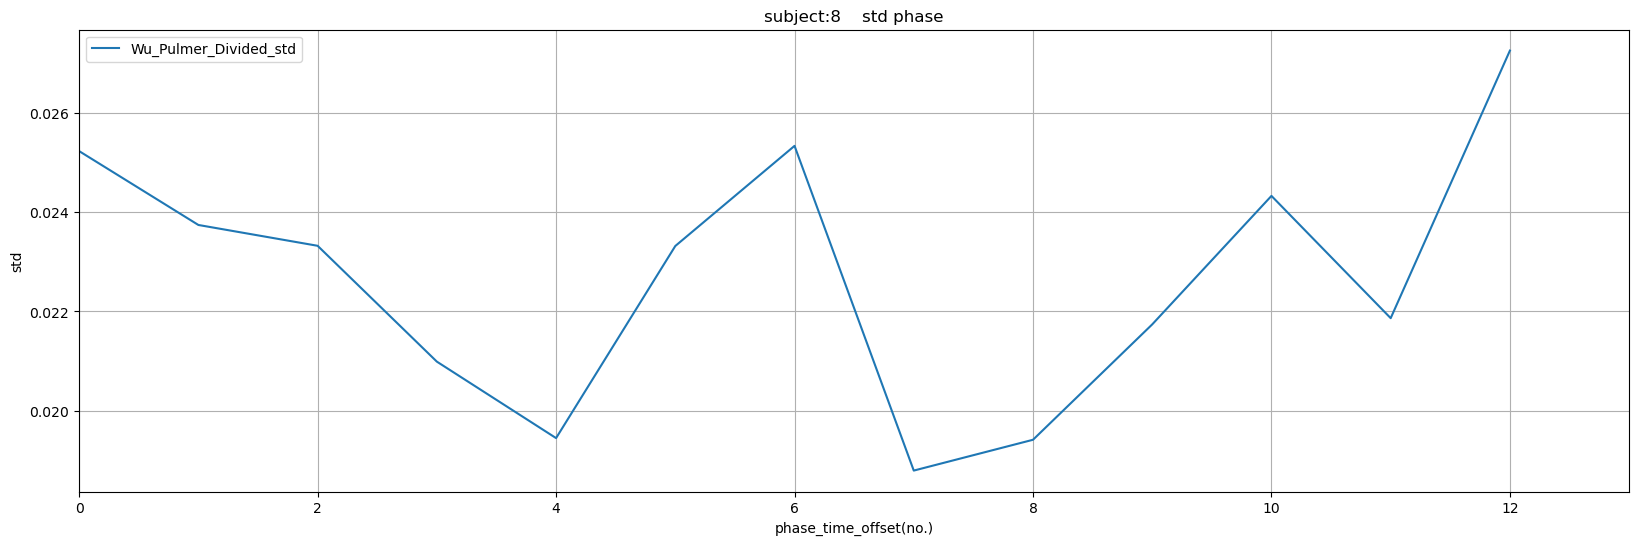

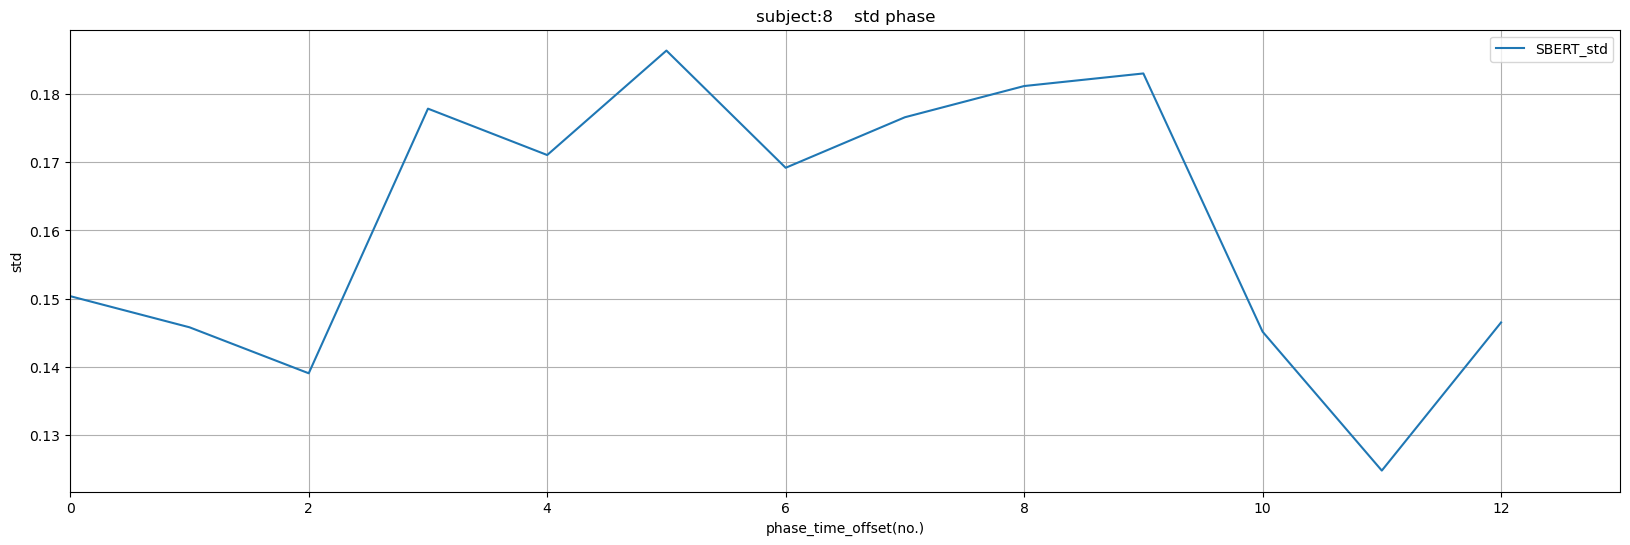

In [216]:
global std1
std1 = []
global std2
std2 = []
subject = int(input("subject = "))
namefreq= int(input("freq = "))
namestartt= int(input("start time = "))
nameendt= int(input("end time = "))
q = subject
start_subject = int(input("start_phase = "))
end_subject = int(input("end_phase = "))
createPDF(subject,f"halfpeakstep_phasef{namefreq}_{namestartt}_{nameendt}_")
global std
std = []
if subject < 10:
    q = subject
    
    for num in range (start_subject,end_subject+1):
        try:
            read(f"data/Text/00{subject}(halfpeakstep_phasef{namefreq}_{namestartt}_{nameendt}_{num}).csv")
            std1.append(statistics.pstdev(Wu_Pulmer_Divided) )
            std2.append(statistics.pstdev(SBERT) )
            
        except:
            print("error:", num)
            continue
    
    fig = plt.figure(figsize=(20,6))
    plt.plot(std1, label = "Wu_Pulmer_Divided_std")

    plt.xlabel("phase_time_offset(no.)")
    plt.ylabel("std")
    plt.title(f"subject:{subject}    std phase")
    plt.grid()
    plt.xlim(0,len(std2))
    plt.ylim()
    plt.legend()
    plt.show
    pdfFile.savefig(fig)
    fig = plt.figure(figsize=(20,6))

    plt.plot(std2, label = "SBERT_std")
    plt.xlabel("phase_time_offset(no.)")
    plt.ylabel("std")
    plt.title(f"subject:{subject}    std phase")
    plt.grid()
    plt.xlim(0,len(std1))
    plt.ylim()
    plt.legend()
    plt.show
    pdfFile.savefig(fig)
    pdfFile.close()
    correlation, p = scipy.stats.kendalltau(std1, std2)
    print(np.corrcoef(std1, std2), "   p=",p)
    pccs = pearsonr(std1, std2)
    print("pcc=",round(pccs[0],4),",p=",round(pccs[1],4))
    print( "f=",namefreq)
else:
    q = subject
    
    for num in range (start_subject,end_subject+1):
        try:
            read(f"data/Text/0{subject}(halfpeakstep_phasef{namefreq}_{namestartt}_{nameendt}_{num}).csv")
            std1.append(statistics.pstdev(Wu_Pulmer_Divided) )
            std2.append(statistics.pstdev(SBERT) )
            
        except:
            print("error:", num)
            continue
    
    fig = plt.figure(figsize=(20,6))
    plt.plot(std1, label = "Wu_Pulmer_Divided_std") 

    plt.xlabel("phase_time_offset(no.)")
    plt.ylabel("std")
    plt.title(f"subject:{subject}    std phase")
    plt.grid()
    plt.xlim(0,len(std2))
    plt.ylim()
    plt.legend()
    plt.show
    pdfFile.savefig(fig)
    fig = plt.figure(figsize=(20,6))

    plt.plot(std2, label = "SBERT_std")
    plt.xlabel("phase_time_offset(no.)")
    plt.ylabel("std")
    plt.title(f"subject:{subject}    std phase")
    plt.grid()
    plt.xlim(0,len(std2))
    plt.ylim()
    plt.legend()
    plt.show
    pdfFile.savefig(fig)
    pdfFile.close() 


    correlation, p = scipy.stats.kendalltau(std1, std2)
    print(np.corrcoef(std1, std2), "   p=",p)
    pccs = pearsonr(std1, std2)
    print("pcc=",round(pccs[0],4),",p=",round(pccs[1],4))
    print( "f=",namefreq)

In [217]:
distance = dtw.distance(std1, std2, window = 10)
print(distance)

0.505258199674703


In [218]:
duration = 1.0
fs = 1
samples = int(fs*duration)
t = []
for i in range(480):
    t.append(i)
print(len(Wu_Pulmer_Divided))

12


In [219]:
'''
num = 1
read(f"data/Text/00{num}(results).csv")
export_numbers()
draw_raw_wu()
draw_SBERT()
draw_wu_divided()
pdfFile.close()
'''

'\nnum = 1\nread(f"data/Text/00{num}(results).csv")\nexport_numbers()\ndraw_raw_wu()\ndraw_SBERT()\ndraw_wu_divided()\npdfFile.close()\n'

ValueError: x and y must have same first dimension, but have shapes (480,) and (12,)

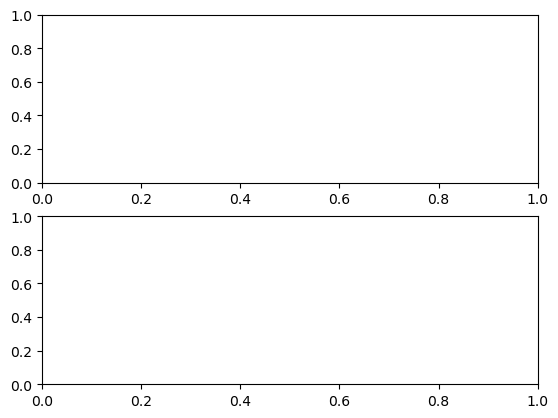

In [220]:
analytic_signal = hilbert(Wu_Pulmer_Divided)
amplitude_envelope = np.abs(analytic_signal)
instantaneous_phase = np.unwrap(np.angle(analytic_signal))
instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * fs)
fig, (ax0, ax1) = plt.subplots(nrows=2)
ax0.plot(t, Wu_Pulmer_Divided, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(0.0, 120.0)
fig.tight_layout()

一般處理

            SBERT    Wu-Pulmer  Wu-Pulmer_divided   pair_counts
count  479.000000   479.000000         479.000000    479.000000
mean     0.883567  1321.501809           0.265614   4984.371608
std      0.103922  1546.499936           0.052496   5894.498123
min      0.396670     0.000000           0.000000      0.000000
25%      0.833045   311.598055           0.242245   1228.500000
50%      0.910853   874.013970           0.268546   3258.000000
75%      0.959941  1650.725702           0.298937   6303.000000
max      1.000000  9826.596298           0.395833  36466.000000


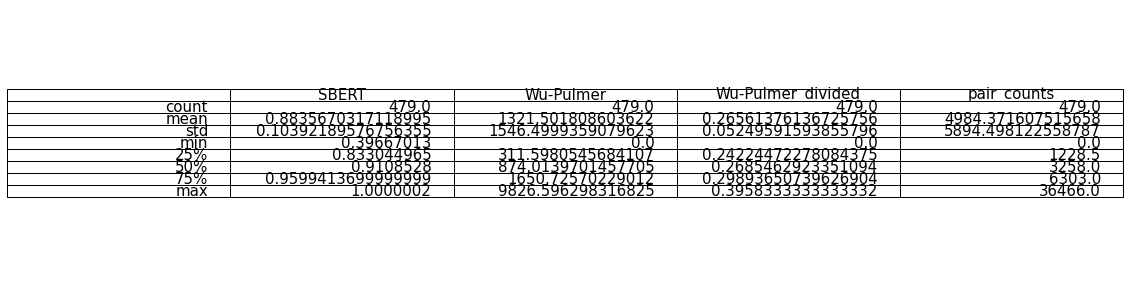

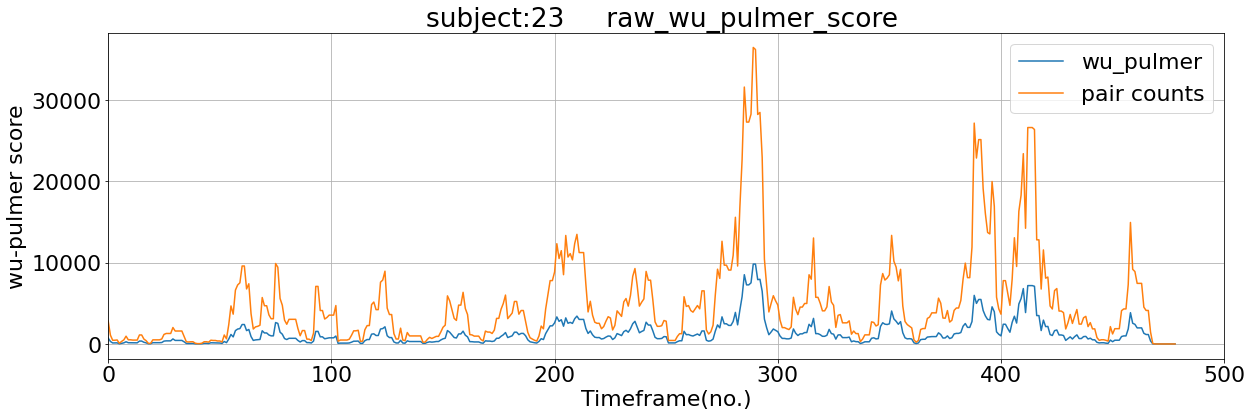

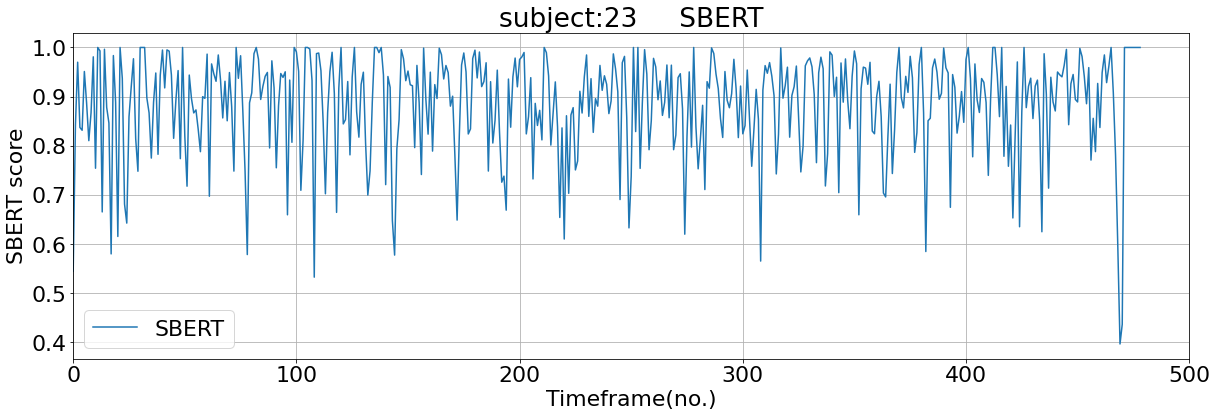

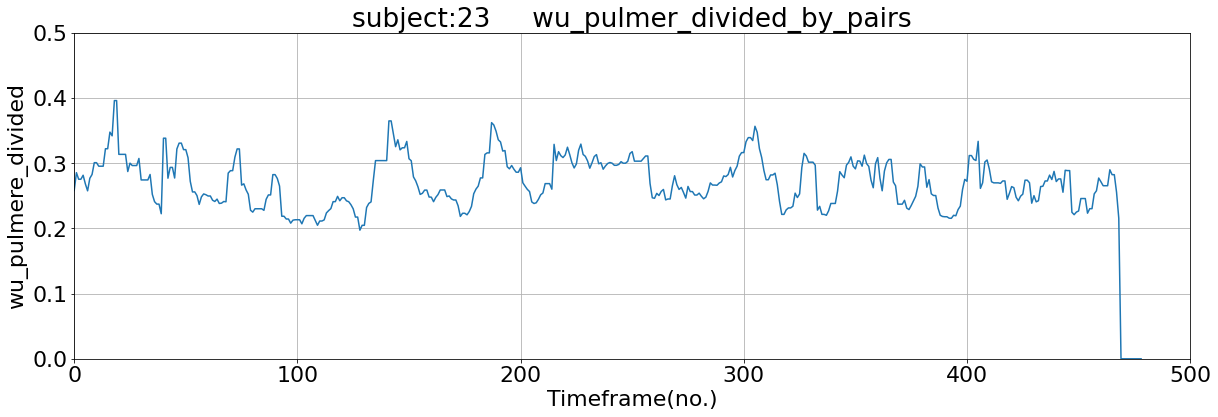

In [ ]:
'''
start_subject = int(input("start_subject = "))
end_subject = int(input("end_subject = "))
for num in range (start_subject,end_subject+1):
    if num < 10:
        try:
            read(f"data/Text/00{num}(peakstep).csv","peakstepchart")
            export_numbers()
            draw_raw_wu()
            draw_SBERT()
            draw_wu_divided()
            pdfFile.close()
        except:
            print("error:", num)
            continue
    else:
        try:
            read(f"data/Text/0{num}(peakstep).csv","peakstepchart")
            export_numbers()
            draw_raw_wu()
            draw_SBERT()
            draw_wu_divided()
            pdfFile.close()
        except:
            print("error:", num)
            continue
'''

In [ ]:
print(df.describe())

            SBERT    Wu-Pulmer  Wu-Pulmer_divided   pair_counts
count  479.000000   479.000000         479.000000    479.000000
mean     0.883567  1321.501809           0.265614   4984.371608
std      0.103922  1546.499936           0.052496   5894.498123
min      0.396670     0.000000           0.000000      0.000000
25%      0.833045   311.598055           0.242245   1228.500000
50%      0.910853   874.013970           0.268546   3258.000000
75%      0.959941  1650.725702           0.298937   6303.000000
max      1.000000  9826.596298           0.395833  36466.000000
